In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
##### setting file path #####

sig_rootpath = "/Storage/Chen-Wang/Lam3000large/Events/run_01/tag_1_delphes_events.root"
sig_file = uproot.open(sig_rootpath)

bg_rootpath = "/Storage/Chen-Wang/BGlarge/Events/run_01/tag_1_delphes_events.root"
bg_file = uproot.open(bg_rootpath)

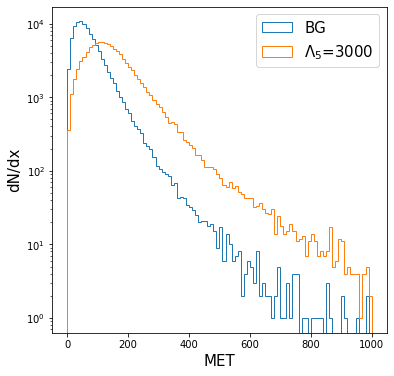

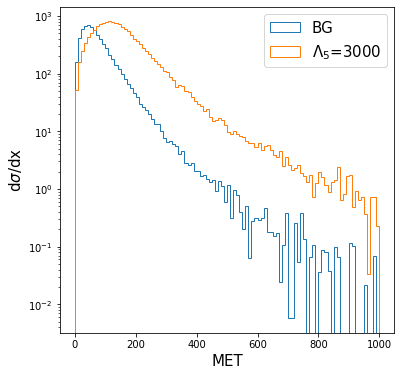

In [3]:
##### get data #####

bg_event_Xsection = bg_file["Delphes;1"]["Event.CrossSection"].array().flatten()
bg_event_MET = bg_file["Delphes;1"]["MissingET.MET"].array().flatten()

sig_event_Xsection = sig_file["Delphes;1"]["Event.CrossSection"].array().flatten()
sig_event_MET = sig_file["Delphes;1"]["MissingET.MET"].array().flatten()

##### visualize #####

bins1 = 100
fs=15 # front size
tagsize = 15 # label tag size
plt.figure(figsize=(6,6)) # plotsize
plt.hist(bg_event_MET, bins=bins1, histtype='step', range=[0,1000], label='BG')
plt.hist(sig_event_MET, bins=bins1, histtype='step', range=[0,1000], label='$\Lambda_5$=3000')
plt.yscale('log')
plt.xlabel('MET' , fontsize=fs)
plt.ylabel('dN/dx' , fontsize=fs)
plt.legend(prop={'size': tagsize}) # plot label tag
plt.show()

plt.figure(figsize=(6,6)) # plotsize
plt.hist(bg_event_MET, bins=bins1, histtype='step', range=[0,1000], label='BG', weights=bg_event_Xsection)
plt.hist(sig_event_MET, bins=bins1, histtype='step', range=[0,1000], label='$\Lambda_5$=3000', weights=sig_event_Xsection)
plt.yscale('log')
plt.xlabel('MET' , fontsize=fs)
plt.ylabel('d$\sigma$/dx' , fontsize=fs)
plt.legend(prop={'size': tagsize}) # plot label tag
plt.show()

In [4]:
num=0
Weight_weight = sig_file["Delphes;1"]["Weight.Weight"].array()
Event_weight = sig_file["Delphes;1"]["Event.Weight"].array().flatten()
print("Evenet.Weight:",Event_weight[num])
print("length of Weight.Weight:",len(Weight_weight[num]))
print("Weight.Weight:\n",Weight_weight[num])

Evenet.Weight: 3.778678e-06
length of Weight.Weight: 146
Weight.Weight:
 [3.7786781e-06 3.1173272e-06 2.6369507e-06 3.6928159e-06 3.0464928e-06
 2.5770316e-06 3.5577059e-06 2.9350299e-06 2.4827452e-06 3.6274819e-06
 3.0124027e-06 2.5547147e-06 3.5290120e-06 2.9306293e-06 2.4853657e-06
 3.3977285e-06 2.8216064e-06 2.3929069e-06 4.5408974e-06 3.6516501e-06
 3.0324727e-06 4.5108436e-06 3.6274819e-06 3.0124027e-06 4.3883947e-06
 3.5290120e-06 2.9306293e-06 3.5062562e-06 2.9276277e-06 2.4880187e-06
 3.3983154e-06 2.8375000e-06 2.4114245e-06 3.2702785e-06 2.7305925e-06
 2.3205703e-06 3.5062562e-06 2.9276277e-06 2.4880187e-06 3.3983154e-06
 2.8375000e-06 2.7987542e-06 2.9037271e-06 2.8175809e-06 2.8301624e-06
 3.1529369e-06 2.7844151e-06 2.8097038e-06 2.8994091e-06 2.8541817e-06
 2.5837685e-06 2.7041592e-06 2.7764054e-06 2.8904965e-06 2.7618712e-06
 2.6955586e-06 2.8423367e-06 2.7921938e-06 2.8418690e-06 2.8526063e-06
 3.2932694e-06 2.7705098e-06 2.8623776e-06 2.9777621e-06 2.7242288e-06
 2.8

total cross section: 0.28375000056257704


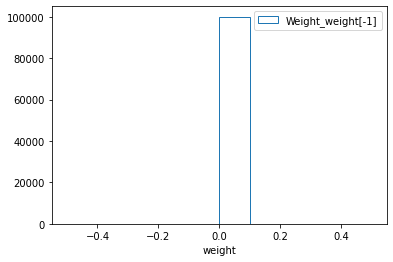

In [5]:
##### If the rela weight is the last component of Weight.Weight #####

weight = Weight_weight[:,-1]
print("total cross section:",sum(weight))
plt.hist(weight,bins=10,histtype='step',label='Weight_weight[-1]')
plt.xlabel("weight")
plt.legend(loc='best')
plt.show()

In [6]:
num = 7
test = sig_file["Delphes;1"]["MissingET.MET"].array()
print(test[num])

[508.93393]


In [7]:
sig_file["Delphes;1"].show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged